In [35]:
import numpy as np
import pandas as pd
import datetime, time
import bisect
import collections
import matplotlib.pyplot as plt
from random import randint
import functools
import heapq
from math import sqrt, floor, log2, ceil
from scipy import stats 

from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import log_loss, mean_squared_error, f1_score, pairwise_distances_argmin
from sklearn.datasets import make_blobs

%matplotlib inline

In [5]:
class SinglyLinkedList:
    """Singly linked list"""
    
    class _Node:
        __slots__ = '_element', '_next'

        def __init__(self, element, next):
            self._element = element
            self._next = next
    
    def __init__(self):
        self._head = None
        self._tail = None
        self._size = 0
        
    def __len__(self):
        return self._size
    
    def is_empty(self):
        return self._size == 0
    
    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._head
    
    def __iter__(self):
        cursor = self._head
        while cursor:
            yield cursor._element
            cursor = cursor._next
    
    def enqueue(self, e):
        if self.is_empty():
            self._head = self._Node(e, None)
            self._size += 1
            self._tail = self._head
        else:
            new_node = self._Node(e, None)
            self._tail._next = new_node
            self._size += 1
            self._tail = new_node
            
    def dequeue(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        result = self._head._element
        self._head = self._head._next
        self._size -= 1
        return result

In [51]:
class TreeNode: 
    __slots__ = 'val', 'left', 'right', 'height'
    
    def __init__(self, val): 
        self.val = val 
        self.left = None
        self.right = None
        self.height = 0

class AVL_Tree: 
    
    def getHeight(self, root): 
        if not root: 
            return -1
  
        return root.height 
  
    def getBalance(self, root): 
        if not root: 
            return 0
  
        return self.getHeight(root.left) - self.getHeight(root.right) 

    def find(self, root, key):
        result = False
        if not root:
            return result

        if key == root.val:
            return True
        elif key < root.val: 
            result = self.find(root.left, key) 
        elif key > root.val: 
            result = self.find(root.right, key) 
        
        return result

    def insert(self, root, key): 
        if not root: 
            return TreeNode(key) 
        elif key < root.val: 
            root.left = self.insert(root.left, key) 
        else: 
            root.right = self.insert(root.right, key) 
  
        root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right)) 

        balance = self.getBalance(root) 
  
        if balance > 1 and key < root.left.val: 
            return self.rightRotate(root) 
  
        if balance < -1 and key > root.right.val: 
            return self.leftRotate(root) 
  
        if balance > 1 and key > root.left.val: 
            root.left = self.leftRotate(root.left) 
            return self.rightRotate(root) 
  
        if balance < -1 and key < root.right.val: 
            root.right = self.rightRotate(root.right) 
            return self.leftRotate(root) 
  
        return root 
  
    def leftRotate(self, z): 
  
        y = z.right 
        T2 = y.left 
  
        y.left = z 
        z.right = T2 
   
        z.height = 1 + max(self.getHeight(z.left), self.getHeight(z.right)) 
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right)) 
  
        return y 
  
    def rightRotate(self, z): 
  
        y = z.left 
        T3 = y.right 
  
        y.right = z 
        z.left = T3 
  
        z.height = 1 + max(self.getHeight(z.left), self.getHeight(z.right)) 
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right)) 
  
        return y 
  
    def preOrder(self, root): 
        
        if root: 
            print(root.val, end=" ")
            self.preOrder(root.left) 
            self.preOrder(root.right) 
          
    def inOrder(self, root): 
        
        if root: 
            self.inOrder(root.left) 
            print(root.val, end=" ")
            self.inOrder(root.right) 

  
  
myTree = AVL_Tree() 
root = None
  
root = myTree.insert(root, 10) 
root = myTree.insert(root, 20) 
root = myTree.insert(root, 30) 
root = myTree.insert(root, 40) 
root = myTree.insert(root, 50) 
root = myTree.insert(root, 25) 
  
"""The constructed AVL Tree would be 
            30 
           /  \ 
         20   40 
        /  \     \ 
       10  25    50"""
  
print("Preorder traversal of the constructed AVL tree is") 
myTree.preOrder(root) 
print()
print("Inorder traversal of the constructed AVL tree is") 
myTree.inOrder(root) 
print()
print(myTree.find(root, 10), myTree.find(root, 8) )

Preorder traversal of the constructed AVL tree is
30 20 10 25 40 50 
Inorder traversal of the constructed AVL tree is
10 20 25 30 40 50 
True False


In [7]:
class HeapPriorityQueue():
    """A min-oriented priority queue implemented with a binary heap."""
    class _Item:
        """Lightweight composite to store priority queue items."""
        __slots__ = '_key', '_value'

        def __init__(self, k, v):
            self._key = k
            self._value = v

        def __lt__(self, other):
            return self._key < other._key

        def __repr__(self):
            return '({0},{1})'.format(self._key, self._value)
    
    
    def __init__(self, contents=()):
        """Create a new priority queue.
        By default, queue will be empty. If contents is given, it should be as an
        iterable sequence of (k,v) tuples specifying the initial contents.
        """
        self._data = [self._Item(k, v) for k, v in contents]
        if len(self._data) > 1:
            self._heapify()
        
    def _parent(self, j):
        return (j-1) // 2

    def _left(self, j):
        return 2*j + 1

    def _right(self, j):
        return 2*j + 2

    def _has_left(self, j):
        return self._left(j) < len(self._data)

    def _has_right(self, j):
        return self._right(j) < len(self._data)

    def _swap(self, i, j):
        self._data[i], self._data[j] = self._data[j], self._data[i]

    def _upheap(self, j):
        parent = self._parent(j)
        if j > 0 and self._data[j] < self._data[parent]:
            self._swap(j, parent)
            self._upheap(parent)

    def _downheap(self, j):
        if self._has_left(j):
            left = self._left(j)
            small_child = left
            if self._has_right(j):
                right = self._right(j)
                if self._data[right] < self._data[left]:
                    small_child = right
            if self._data[small_child] < self._data[j]:
                self._swap(j, small_child)
                self._downheap(small_child)
            
    def _heapify(self):
        start = self._parent(len(self) - 1)
        for j in range(start, -1, -1):
            self._downheap(j)

    def __len__(self):
        """Return the number of items in the priority queue."""
        return len(self._data)
    
    def is_empty(self):
        """Return True if the priority queue is empty."""
        return len(self) == 0

    def add(self, key, value):
        """Add a key-value pair to the priority queue."""
        self._data.append(self._Item(key, value))
        self._upheap(len(self._data) - 1)

    def min(self):
        """Return but do not remove (k,v) tuple with minimum key.
        Raise Empty exception if empty.
        """
        if self.is_empty():
            raise Empty('Priority queue is empty.')
        item = self._data[0]
        return (item._key, item._value)

    def remove_min(self):
        """Remove and return (k,v) tuple with minimum key.
        Raise Empty exception if empty.
        """
        if self.is_empty():
            raise Exception('Priority queue is empty.')
        self._swap(0, len(self._data) - 1)
        item = self._data.pop()
        self._downheap(0)
        return (item._key, item._value)

In [8]:
h = HeapPriorityQueue([(1, 2), (2, 0), (-1, 5)])
print(h.min())
print(h.remove_min())
print(h.min())

(-1, 5)
(-1, 5)
(1, 2)


In [9]:
# find shortest distance between two words in large text
def dist_between_words(text, word1, word2):
    word1_l = []
    word2_l = []
    text = text.split(' ')
    for i, word in enumerate(text):
        word = word.lower()
        if not word[-1].isalnum():
            word = word[:-1]
            
        if word == word1:
            word1_l.append(i)
        elif word == word2:
            word2_l.append(i)
    
    return word1_l, word2_l

def merge_lists(arr1, arr2):
    n1 = len(arr1)
    n2 = len(arr2)
    arr3 = [None] * (n1 + n2) 
    i = 0
    j = 0
    k = 0

    while i < n1 and j < n2: 
        if arr1[i] < arr2[j]: 
            arr3[k] = (arr1[i], '1') 
            k = k + 1
            i = i + 1
        else: 
            arr3[k] = (arr2[j], '2')
            k = k + 1
            j = j + 1
      
    while i < n1: 
        arr3[k] = (arr1[i], '1') 
        k = k + 1
        i = i + 1

    while j < n2: 
        arr3[k] = (arr2[j], '2') 
        k = k + 1
        j = j + 1
        
    return arr3

s = 'I b d s, I. s s'
word1_l, word2_l = dist_between_words(s, 'i', 's')
print(word1_l, word2_l)
merge_lists(word1_l, word2_l )

[0, 4] [3, 5, 6]


[(0, '1'), (3, '2'), (4, '1'), (5, '2'), (6, '2')]

In [10]:
# ds for O(1) median method
class Array_Median:
    def __init__(self, data):
        self._data = data
        temp = sorted(self._data)
        
        # invert to be max heap
        self._low = [-i for i in temp[:len(temp) // 2]]
        heapq.heapify(self._low)
        
        self._high = temp[len(temp) // 2:]
        heapq.heapify(self._high)
        
        self._low_size = len(self._low)
        self._high_size = len(self._high)
        
        del temp
        
    def get_low(self):
        return -self._low[0]
    
    def get_high(self):
        return self._high[0]

    def median(self):
        if (self._low_size + self._high_size) % 2 == 0:
            e1 = self.get_low()
            e2 = self.get_high()
            return (e1 + e2) / 2
        
        elif self._low_size > self._high_size:
            e1 = self.get_low()
            return e1
        
        elif self._low_size < self._high_size:
            e2 = self.get_high()
            return e2
        
    def add(self, element):
        e1 = self.get_low()
        e2 = self.get_high()

        if element == e1 and element == e2:
            # push into heap that are smaller
            if self._low_size >= self._high_size:
                heapq.heappush(self._high, element)
                self._high_size += 1
            else:
                heapq.heappush(self._low, -element)
                self._low_size += 1
                
        elif element >= e2:
            heapq.heappush(self._high, element)
            self._high_size += 1
            if self._high_size - self._low_size > 1:
                heapq.heappush(self._low, -heapq.heappop(self._high))
                self._low_size += 1
                self._high_size -= 1

        elif element <= e1:
                heapq.heappush(self._low, -element)
                self._low_size += 1
                if self._low_size - self._high_size > 1:
                    heapq.heappush(self._high, -heapq.heappop(self._low))
                    self._low_size -= 1
                    self._high_size += 1
                    
        elif e1 < element < e2:
            # push into heap that are smaller
            if self._low_size >= self._high_size:
                heapq.heappush(self._high, element)
                self._high_size += 1
            else:
                heapq.heappush(self._low, -element)
                self._low_size += 1

### Maximum in the sliding window

In [13]:
class MaxStack:
    def __init__(self):
        self._data = []
        self._size = 0
    
    def push(self, e):
        if self._size == 0:
            self._data.append([e, e])
            self._size += 1
        else:
            temp = self._data[-1][1]
            self._data.append([e, e if temp < e else temp])
            self._size += 1
    
    def pop(self):
        if self._size == 0:
            raise ValueError('stack is empty')
        self._size -= 1
        return self._data.pop()
    
    def top(self):
        if self._size == 0:
            raise ValueError('stack is empty')
        return self._data[-1]

class MaxQueue:
    def __init__(self):
        self._inp = MaxStack()
        self._out = MaxStack()
        
    def enqueue(self, e):
        self._inp.push(e)
        
    def dequeue(self):
        if self._out._size == 0:
            for i in range(self._inp._size):
                self._out.push(self._inp.pop()[0])
                
        if self._inp._size == 0:
            res = self._out.pop()[1]
        else:
            out_max = self._out.pop()[1]
            inp_max = self._inp.top()[1]
            res = out_max if out_max > inp_max else inp_max
            
        return res

n = 5
m = 2
a = [2, 1, 5, 3, 4]

mq = MaxQueue()
result = []
for i in range(m):
    mq.enqueue(a[i])

for i in range(n - m):
    result.append(str(mq.dequeue()))
    mq.enqueue(a[i+m])
result.append(str(mq.dequeue()))
print(' '.join(result))

2 5 5 4


In [11]:
# LMS, Linear Regression
x, y = datasets.load_boston(return_X_y=True)
scaler = StandardScaler()
x = scaler.fit_transform(x)
# add 1 to each feature vector
x = np.concatenate(seq=[x, np.ones(shape=(x.shape[0], 1))], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
theta = np.zeros(shape=(x_train.shape[1], 1))

def lms_cost_function(x, y, theta):
    J = np.sum((x.dot(theta) - y)**2) / (2 * x.shape[0])
    return J

def lms_gradient_descent(x, y, theta, alpha, iterations):    
    for iteration in range(iterations):
        loss = x.dot(theta) - y.reshape((-1, 1))
        gradient = x.T.dot(loss) / x.shape[0]
        theta = theta - alpha * gradient

    return theta

print(lms_cost_function(x_train, y_train, theta))
new_theta = lms_gradient_descent(x_train, y_train, theta, 1e-2, 10000)
print(lms_cost_function(x_train, y_train, new_theta))
print(lms_cost_function(x_test, y_test, new_theta))

109654.89
25820.9528723677
9963.039978719264


In [13]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, x_test.dot(new_theta)))

21.889369432474997
21.890322868064114


In [18]:
# Logistic regression
x, y = datasets.load_breast_cancer(return_X_y=True)
scaler = StandardScaler()
x = scaler.fit_transform(x)
# add 1 to each feature vector
x = np.concatenate(seq=[x, np.ones(shape=(x.shape[0], 1))], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
theta = np.zeros(shape=(x_train.shape[1], 1))

def sigma(x):
    return 1 / (1 + np.exp(-x))

def log_cost_function(x, y, theta):
    
    J = -np.sum(y * np.log(sigma(x.dot(theta))) + 
                (1 - y) * np.log(1 - sigma(x.dot(theta)))) / x.shape[0]

    return J

def log_gradient_descent(x, y, theta, alpha, iterations):    
    for iteration in range(iterations):
        gradient = x.T.dot(sigma((x.dot(theta))[:, 0] - y)).reshape((-1,1)) / x.shape[0]
        theta = theta - alpha * gradient


    return theta

print(log_cost_function(x_train, y_train, theta))
new_theta = log_gradient_descent(x_train, y_train, theta, 1e-6, 10000)
print(log_cost_function(x_train, y_train, new_theta))
print(log_cost_function(x_test, y_test, new_theta))

295.2806989185367
295.4914769708851
99.17732878972522


In [19]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(log_loss(y_test, y_pred))
print(log_loss(y_test, sigma(x_test.dot(new_theta))))

0.7246008977593886
0.6892221577034601


In [27]:
def reverse_str(s):
    lst = list(s)
    for i in range(len(lst) // 2):
        lst[i], lst[-1-i] = lst[-1-i], lst[i]
    return ''.join(lst)


reverse_str('abc')

'cba'

In [18]:
# print permutaion
def perm(lst):
    arr = []
    while lst:
        if len(arr) == 0:
            arr.append(lst.pop())
        else:
            temp = []
            new_element = lst.pop()
            for elemnt in arr:
                for pos in range(len(elemnt)+1):
                    temp.append(elemnt[pos:] + new_element + elemnt[:pos])
            arr = temp

    for e in arr:
        print(e)
        
perm(['a', 'b', 'c'])

cba
bac
acb
bca
cab
abc


In [17]:
def binary_search(input_array, value):
    l = 0
    r = len(input_array) - 1
    
    while l <= r: 
        mid = int(l + (r - l)/2)
          
        if input_array[mid] == value: 
            return mid 
  
        elif input_array[mid] < value: 
            l = mid + 1
  
        else: 
            r = mid - 1
    
    return -1

test_list = [1,3,9,11,15,19,29]
test_val1 = 25
test_val2 = 15
print(binary_search(test_list, test_val1))
print(binary_search(test_list, test_val2))

-1
4


### Implement a program to provide in real-time a list of the top 100 most viewed properties in the last hour. Properties are represented by a ‘zpid’ or Zillow property ID, which is a unique string.

In [2]:
# Generate data
current = datetime.datetime.fromtimestamp(time.time())
rand_symbol = np.random.choice(list('abcdefgh'), size=1000)
rand_minutes = np.random.uniform(low=0, high=180, size=1000)

data = [(rand_symbol[i], current - datetime.timedelta(minutes=rand_minutes[i])) for i in range(len(rand_symbol))]

# sort data by time
data = sorted(data, key = lambda x: x[1], reverse=True)
create_time = datetime.datetime.fromtimestamp(time.time())
keys = [(create_time - r[1]).seconds for r in data]
values = [r[0] for r in data]

idx = bisect.bisect_right(keys, 3600)

counter = collections.Counter(values[:idx])
counter.most_common(3)

[('a', 46), ('g', 45), ('c', 43)]

In [3]:
# def current_position(data, last_call):
#     now = time.time()
#     idx = bisect.bisect_right(data, 3600 - (now - last_call))
#     yield (idx, now)
    
# now = time.time()
# while True:
#     idx, now = next(current_position(keys, last_call=now))
#     counter = collections.Counter(values[:idx])
#     top3 = counter.most_common(3)
#     print(top3)
#     # while sleep add new data to begining of keys and values 
#     time.sleep(10)

### Find N most frequently used 3-page sequences in a list of pages.

In [4]:
array = np.random.randint(low=0, high=9, size=100)
counter = collections.Counter((' '.join([str(j) for j in array[i:i+3].tolist()]) 
                               for i in range(array.shape[0]-3)))
counter.most_common(1)

[('6 7 7', 2)]

### Make qq plot

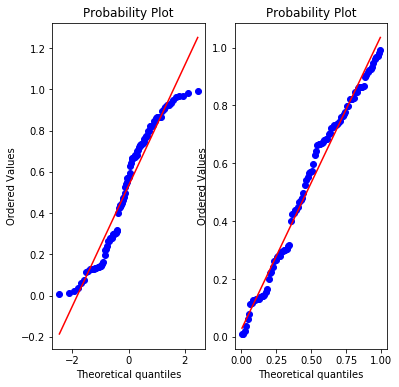

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))

data = np.random.uniform(size=100)

stats.probplot(data, dist='norm', plot=ax[0]);
stats.probplot(data, dist='uniform', plot=ax[1]);

### Given points on the Cartesian plane. Return the K points closest to the origin (0,0).

In [30]:
heap = [2, 1, 0]
heapq.heapify(heap)

In [31]:
heap

[0, 1, 2]

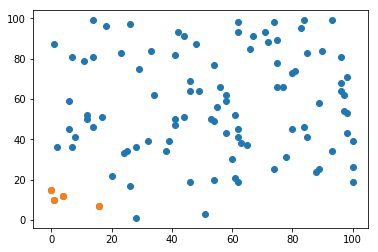

In [29]:
def distance(pointA, pointB):
    return sqrt((pointB[0] - pointA[0]) ** 2 + (pointB[1] - pointA[1]) ** 2)

def closest(points, k, origin):
    # max heap of size k
    heap = [(-distance(p, origin), p) for p in points[:k]]
    heapq.heapify(heap)
    
    # if new point is closer than remotest in heap
    # delete remote one and push new one
    for p in points[k:]:
        d = distance(p, origin)
        if d < -heap[0][0]:
            heapq.heappushpop(heap, (-d, p))
            
    return [p for d, p in heap]

points = [(randint(0, 100), randint(0, 100)) for i in range(100)]
k = 4
resA = closest(points, k, (0, 0))
plt.scatter(*zip(*points))
plt.scatter(*zip(*resA))

### Implement a KNN classifier

In [8]:
# def classifyKNN(train, test, k, n):
#     def dist (a, b):
#         return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
#     test_labels = []
#     for p in test:
#         #Claculate distances between test point and all of the train points
#         test_dist = [[dist(p, train[i][0]), train[i][1]] for i in range(len(train))]
#         #How many points of each class among nearest K
#         stat = [0] * len(n)
#         for d in sorted(test_dist, key=lambda x: x[0])[0:k]:
#             stat[d[1]] += 1
#         #Assign a class with the most number of occurences among K nearest neighbours
#         test_labels.append(sorted(zip(stat, range(n)), reverse=True)[0][1])
#     return test_labels

def distance(point1, point2):
    # L2
    point1 = np.array(point1) 
    point2 = np.array(point2)
    
    return np.linalg.norm(point1 - point2)

def get_neighbors(training_set, labels, test_point, k):
    distances = []
    
    for index in range(len(training_set)):
        dist = distance(test_point, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    
    return neighbors

def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

def vote_prob(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)

### Segregate 0s and 1s in an array

In [9]:
def segregate0and1(arr, size):
    # Initialize left and right indexes
    left, right = 0, size-1
     
    while left < right:
        # Increment left index while we see 0 at left
        while arr[left] == 0 and left < right:
            left += 1
 
        # Decrement right index while we see 1 at right
        while arr[right] == 1 and left < right:
            right -= 1
 
        # If left is smaller than right then there is a 1 at left
        # and a 0 at right. Exchange arr[left] and arr[right]
        if left < right:
            arr[left] = 0
            arr[right] = 1
            left += 1
            right -= 1
    return arr

### Find the Missing Number that changed by duplicate in array with int from 1 to n

In [14]:
def find_missing(a):
    n = len(a)
    b = [0] * n
    sum_without_dup = 0 
    for i in range(n):
        if b[a[i] - 1] == 0:
            sum_without_dup += a[i]
        b[a[i] - 1] += 1
    return (n * (n + 1) / 2) - sum_without_dup

### K-means

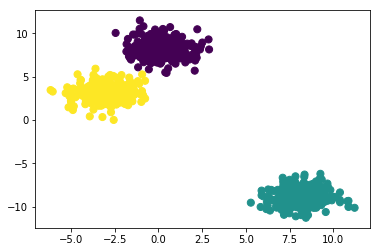

In [37]:
X, y = make_blobs(n_samples=800, n_features=2, centers=3)

def find_clusters(X, n_clusters, rseed=2):
    # Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = np.random.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

In [51]:
# model n cores and m task 
n, m = 2, 5
arr = [1, 2, 3, 4, 5]

heap = [(0, i) for i in range(n)]
heapq.heapify(heap)

for i in range(m):
    start_time, num_cor = heapq.heappop(heap)
    print(num_cor, start_time)
    heapq.heappush(heap, (start_time + arr[i], num_cor))

0 0
1 0
0 1
1 2
0 4


In [62]:
# phone book (dict with open adressing)
n = int(input())
my_dict = [None] * 10**7

result = []
for i in range(n):
    command = input().split()
    if command[0] == 'add':
        my_dict[int(command[1])] = command[2]
    elif command[0] == 'del':
        my_dict[int(command[1])] = None
    else:
        answer = my_dict[int(command[1])]
        if my_dict[int(command[1])] == None:
            reselt = 'not found'
        else:
            result.append(my_dict[int(command[1])])
        
for res in result:
    print(res)

add 911 police
find 911
police


In [113]:
# dict with separate chaining
# m = int(input())
# n = int(input())
m = 5
n = 12
my_dict = [[] for i in range(m)]
p = 10**9 + 7
x = 263
result = []
x_arr = [1]
for i in range(1, 20):
    x_arr.append((x_arr[-1] % p * x % p) % p)


def my_hash(s):
    index = 0
    for i, char in enumerate(s):
        index += (ord(char) * x_arr[i])
    return (index % p) % m

for i in range(n):
    command = input().split()
    
    if command[0] == 'add':
        index = my_hash(command[1])
        if command[1] in my_dict[index]:
            pass
        else:
            my_dict[index].append(command[1])
    
    elif command[0] == 'del':
        index = my_hash(command[1])
        if command[1] in my_dict[index]:
            my_dict[index].remove(command[1])
        else:
            pass
        
    elif command[0] == 'find':
        index = my_hash(command[1])
        if command[1] in my_dict[index]:
            result.append('yes')
        else:
            result.append('no')
    elif command[0] == 'check':
        index = int(command[1])
        if len(my_dict[index]) == 0:
            result.append('')
        else:
            result.append(' '.join(my_dict[index][::-1]))

for res in result:
    print(res)

In [232]:
# Rabin–Karp algorithm
s = 'testTesttesT'
pattern = 'Test'
l = len(pattern)
x = 263
p = 10**9 + 7
result = []

pat_hash = 0
for char in pattern:
    pat_hash += (ord(char) % p * x % p) % p
pat_hash = pat_hash % p

sub_hash = 0 
for i in range(l):
    sub_hash += (ord(s[i]) % p * x % p) % p
sub_hash = sub_hash % p
    
if pat_hash == sub_hash and pattern == s[:l]:
    result.append('0')
    
for i in range(1, len(s)-l+1):
    hash_0 = (ord(s[i-1]) % p * x % p) % p
    hash_end = (ord(s[i+l-1]) % p * x % p) % p
    sub_hash = (sub_hash % p - hash_0 % p) % p
    sub_hash = (sub_hash % p + hash_end % p) % p
       
    if pat_hash == sub_hash and pattern == s[i:i+l]:
        result.append(str(i))
        
for res in result:
    print(res)

4


### Greedy Algorithm

In [236]:
# number is palindrome
def isPalindrome(n):
    
    divisor = 1
    while (n / divisor >= 10):
        divisor *= 10
 
    while (n != 0):
        leading = n // divisor 
        trailing = n % 10
         
        if (leading != trailing): 
            return False
         
        n = (n % divisor)//10
        divisor = divisor/100
         
    return True
 
if(isPalindrome(1001)):
    print('Yes, it is palindrome')
else:
    print('No, not palindrome')

Yes, it is palindrome


In [241]:
# Job Sequencing 
def jobScheduling(jobs):
    jobs.sort(key= lambda x: x[2], reverse=True)
    job_sch = [None] * len(jobs)
    for i in range(len(jobs)):
        for j in range(jobs[i][1]-1, -1, -1):
            if job_sch[j] == None:
                job_sch[j] = jobs[i][0]
                break
    print(job_sch)

jobs = [['a', 2, 100], ['b', 1, 19], ['c', 2, 27],['d', 1, 25], ['e', 3, 15]]
jobScheduling(jobs)

['c', 'a', 'e', None, None]


In [28]:
# find Minimum number of Coins
def find_change(amount, coins):
    result = []
    coins.sort(reverse=True)
    while amount > 0:
        for coin in coins:
            if amount >= coin:
                amount -= coin
                result.append(coin)
            continue
    return result

find_change(5, [2,1,3])

[3, 2]

In [4]:
# Connect n ropes with minimum cost

def min_cost(arr):
    cost = 0
    heapq.heapify(arr)
    while len(arr) != 1:
        a = heapq.heappop(arr) + heapq.heappop(arr)
        cost += a
        heapq.heappush(arr, a)
    return cost

min_cost([4, 3, 2, 6])

29

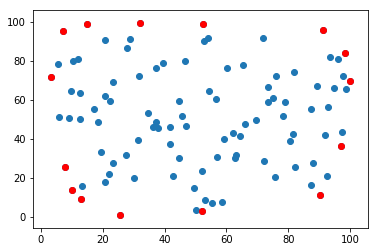

In [14]:
# Graham scan
def on_which_side(A, B, C):
    """Return > 0 if point C is from left side of vector AB else < 0"""
    return (B[0] - A[0]) * (C[1] - B[1]) - (B[1] - A[1]) * (C[0] - B[0])

def grahamscan(A):
    n = len(A)
    p = list(range(n))
    # find smallest x and put it on 0 position
    for i in range(1, n):
        if A[p[i]][0] < A[p[0]][0]:
            p[i], p[0] = p[0], p[i]
    # sort all other except first one in increasing order of the angle        
    base = p[0]
    del p[0]
    p.sort(key=functools.cmp_to_key(lambda x, y: on_which_side(A[base], A[y], A[x])))
    p.insert(0, base)
    # if new point is required right turn dek this point
    s = [p[0], p[1]]
    for i in range(2, n):
        while on_which_side(A[s[-2]], A[s[-1]], A[p[i]]) < 0:
            del s[-1]
        s.append(p[i])
    return s
    
points = np.random.rand(100, 2) * 100
plt.scatter(points[:, 0], points[:, 1])
idx = grahamscan(points)
plt.scatter(x=points[idx, 0], y=points[idx, 1], c='r') 

### Dijkstra’s shortest path

In [69]:
# naive implementaion
for i, string in enumerate(['3 2', '1 2 10', '2 3 1', '1 3']):
    if i == 0:
        n_v, n_e = map(int, string.split())
        graph_matrix = [[None for i in range(n_v)] for j in range(n_v)]
    elif i == n_e + 1:
        from_vert, to_vert = map(int, string.split())
    else:
        vert1, vert2, weight = map(int, string.split())
        graph_matrix[vert1-1][vert2-1] = weight
        
d = [np.inf for i in range(n_v)]
d[from_vert - 1] = 0

q = set([i for i in range(n_v)])

candidate_vert = None
flag = 0
while len(q) != 0:
    # extract min vertex
    current_min = np.inf
    for i in q:
        if current_min > d[i]:
            current_min = d[i]
            candidate_vert = i
    try:
        q.remove(candidate_vert)
    except KeyError:
        print(-1)
        flag = 1
        break
    
    for i, vert in enumerate(graph_matrix[candidate_vert]):
        if vert and d[i] > d[candidate_vert] + vert:
            d[i] = d[candidate_vert] + vert

if not flag:
    print(d[to_vert - 1])

{0, 1, 2} [0, inf, inf] 0
{1, 2} [0, 10, inf] 1
{2} [0, 10, 11] 2
11
